<a href="https://colab.research.google.com/github/MahmoudHabibForsan/MahmoudHabibForsan.github.io/blob/master/Final_Project_Prof_training_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
!pip install -q ultralytics opencv-python matplotlib
from google.colab import files
uploaded = files.upload()

import os
video_path = next(iter(uploaded))
print(f"Uploaded video: {video_path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00


Saving 75.0-196.0.mp4 to 75.0-196.0.mp4
Uploaded video: 75.0-196.0.mp4


Loading and using Yolov8 Segmentation model

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.pt') # 8n is faster while 8s is better

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 116MB/s]


Segmentation and Classification

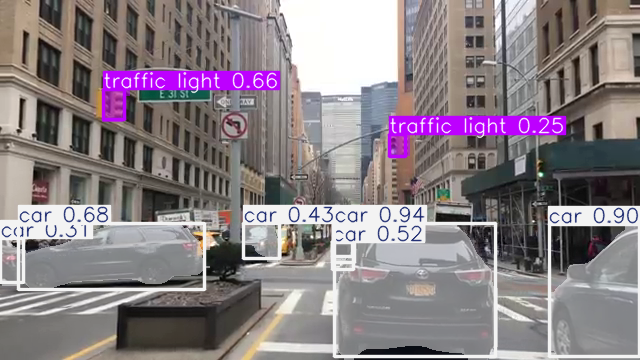

In [ ]:
import cv2
from IPython.display import display, clear_output
import PIL.Image

# Open the video
cap = cv2.VideoCapture(video_path)

# Setting the writer to save the video basically
output_path = 'annotated_output.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_count = 0
while cap.isOpened() and frame_count < 200:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    # Annotate
    annotated_frame = results[0].plot()

    # Write to Output
    out.write(annotated_frame)

    # Display the frame that's being annotated
    img = PIL.Image.fromarray(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    clear_output(wait=True)
    display(img)

    frame_count += 1

cap.release()
out.release()


Downloading the final thing

In [ ]:
from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>